<a href="https://colab.research.google.com/github/stiwari-ds/data-science-competitions/blob/main/zindi/landslide_prevention/notebooks/00_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import gc
import os
import warnings

gc.enable()
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
np.set_printoptions(precision=2)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [2]:
SEED = 23
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_PATH = '/content/drive/MyDrive/data_science_competitions/zindi/landslide_prevention/data'
train = pd.read_csv(f'{DATA_PATH}/raw/train.csv')
test = pd.read_csv(f'{DATA_PATH}/raw/test.csv')
sample_sub = pd.read_csv(f'{DATA_PATH}/raw/sample_sub.csv')

# Data overview

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Columns: 227 entries, Sample_ID to Label
dtypes: float64(175), int64(52)
memory usage: 18.8 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Columns: 226 entries, Sample_ID to 25_sdoif
dtypes: float64(175), int64(51)
memory usage: 9.4 MB


In [7]:
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.2644,37.2921,33.8545,35.7958,40.3155,38.8767,39.5097,40.5106,45.8345,45.0000,36.0550,40.5106,44.5637,41.8103,38.8767,33.8545,38.8767,33.8545,33.8545,32.6319,32.6319,30.2463,30.2463,30.2463,30.2463,98.1301,113.1986,116.5650,123.6901,135.0000,97.1250,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.0385,0.0295,0.0314,0.0258,0.0105,0.0283,0.0274,0.0198,0.0093,0.0088,0.0215,0.0212,0.0173,0.0067,-0.0087,0.0239,0.0126,-0.0042,0.0036,-0.0068,0.0133,0.0053,0.0070,-0.0178,-7.7772e-03,1.3903e-02,0.0147,0.0182,0.0184,0.0033,0.0020,0.0057,0.0022,-0.0038,-0.0033,-0.0021,0.0036,0.0020,-0.0123,-0.0272,0.0010,-0.0126,-0.0316,-0.0257,-0.0374,-0.0189,-0.0219,-0.0236,-0.0485,-0.0391,8.0452,8.3330,7.8194,8.0322,9.8189,9.2958,9.3751,9.4994,10.9229,11.0019,9.3399,9.8832,11.0358,10.2980,9.6189,8.7032,10.1758,8.6511,8.2511,8.0745,8.5199,7.9892,7.6343,7.8042,7.2192,3.1733,2.9614,3.3159,3.0612,3.2469,3.2217,3.1535,3.0486,2.9155,3.0740,3.7653,3.2467,3.1545,3.2378,3.3925,3.8513,3.6739,3.8213,3.5846,3.7346,4.0031,4.2181,3.9909,4.1009,3.7152,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.2818,1.2817,1.2817,1.2817,1.2816,1.2818,1.2818,1.2817,1.2817,1.2817,1.2818,1.2818,1.2817,1.2817,1.2817,1.2818,1.2818,1.2817,1.2817,1.2817,1.2818,1.2818,1.2818,1.2817,1.2817,0
1,2,161,158,155,153,151,162,159,155,153,151,162,159,156,153,151,162,160,157,153,151,162,160,157,154,150,32.3115,32.3115,26.5650,21.8014,22.4069,27.0171,35.2644,31.3112,21.8014,21.8014,30.9638,31.3112,32.3115,26.5650,21.8014,26.5650,27.0171,35.2644,31.31

In [8]:
sample_sub.head()

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,0
4,10869,0


In [9]:
train.shape, test.shape, sample_sub.shape

((10864, 227), (5430, 226), (5430, 2))

In [10]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

### Target variable

In [11]:
TARGET = 'Label'

In [12]:
train[TARGET].value_counts(normalize=True)

0    0.75
1    0.25
Name: Label, dtype: float64

Moderate imbalance.

# Data exploration

## Based on feature types: elevation, slope, aspect, etc.

In [13]:
features = list(test.columns)
features.remove('Sample_ID')

In [14]:
def plot_corr_matrix(corr_df, size=10):
    plt.figure(figsize=(size, size))
    sns.heatmap(corr_df,
                mask=np.triu(np.ones_like(corr_df)),
                vmin=-1, vmax=1, center=0, 
                annot=True, 
                linewidths=0.1)
    plt.show()

### elevation
Digital elevation of the terrain surface in meter

In [15]:
elevation_cols = [f for f in features if f.endswith('elevation')]

In [16]:
elevation_corr = train[elevation_cols].corr()

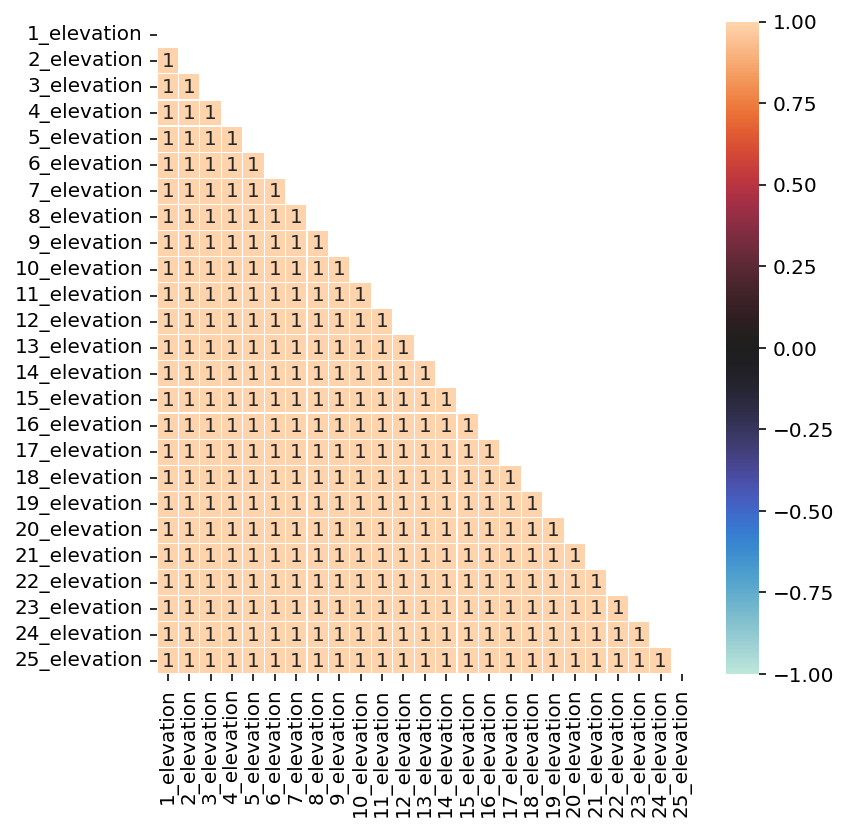

In [17]:
plot_corr_matrix(elevation_corr, 6)

Perfect correlation for the entire sample. It will be pointless to include all cell-elevations, so we can create aggregate features and use them instead.

### slope
Angle of the slope inclination in degree

In [18]:
slope_cols = [f for f in features if f.endswith('slope')]

In [19]:
slope_corr = train[slope_cols].corr()

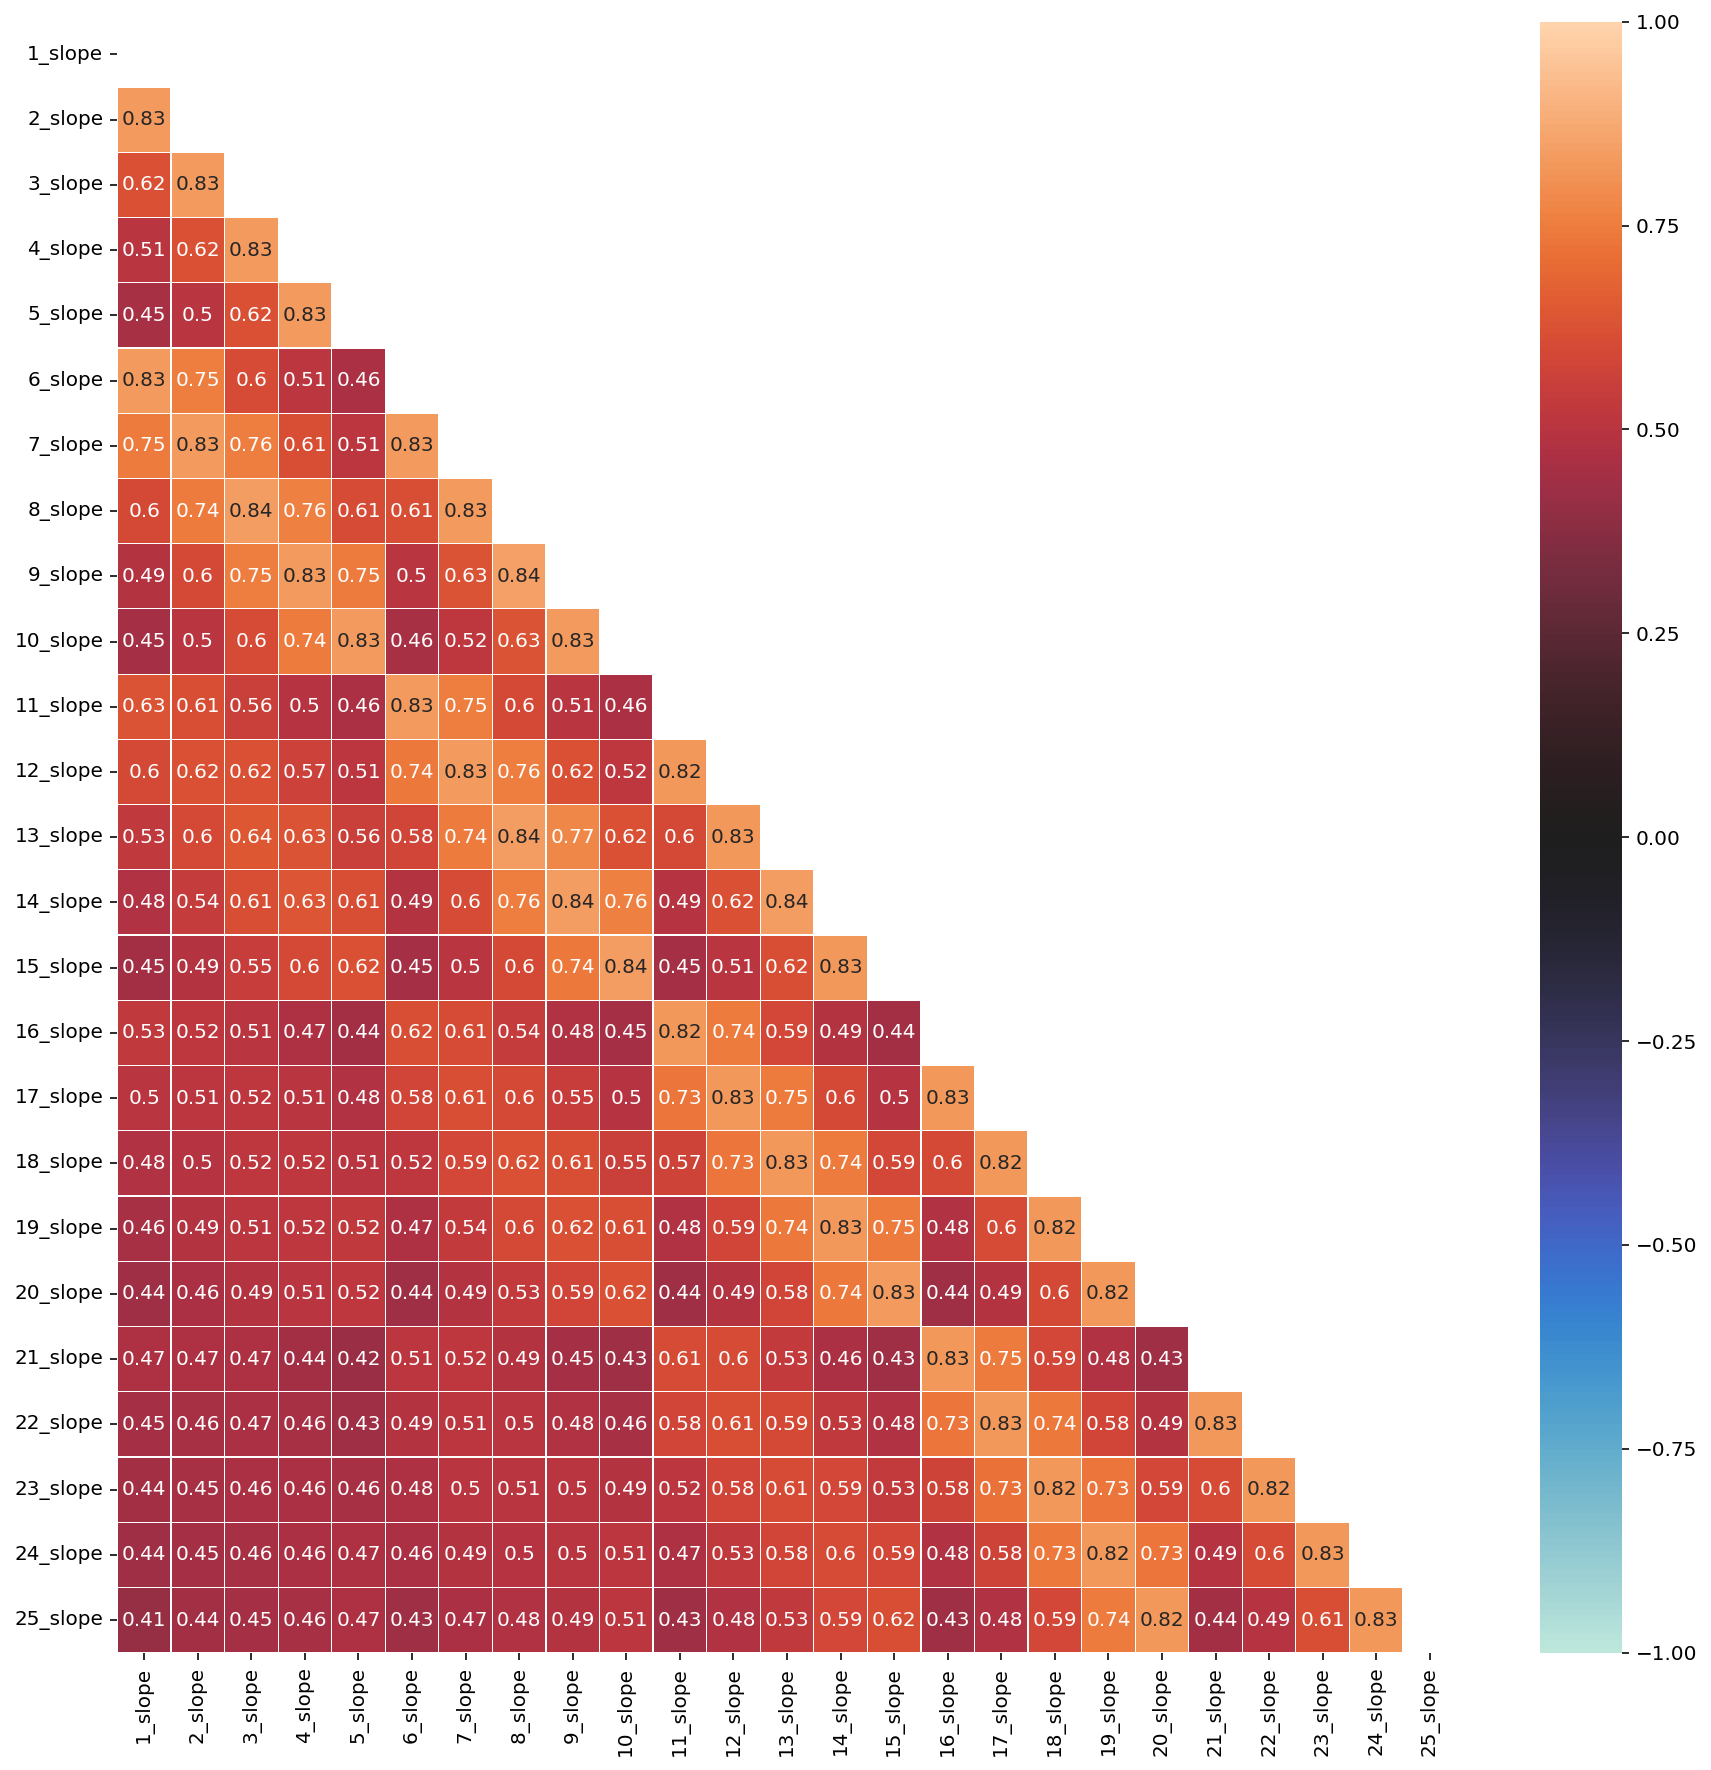

In [20]:
plot_corr_matrix(slope_corr, 15)

High correlation between adjacent cells (vertical as well as horizontal neighbours), but it starts decreasing with increase in distance between cells.

### aspect
Exposition of the slope in degree

In [21]:
aspect_cols = [f for f in features if f.endswith('aspect')]

In [22]:
aspect_corr = train[aspect_cols].corr()

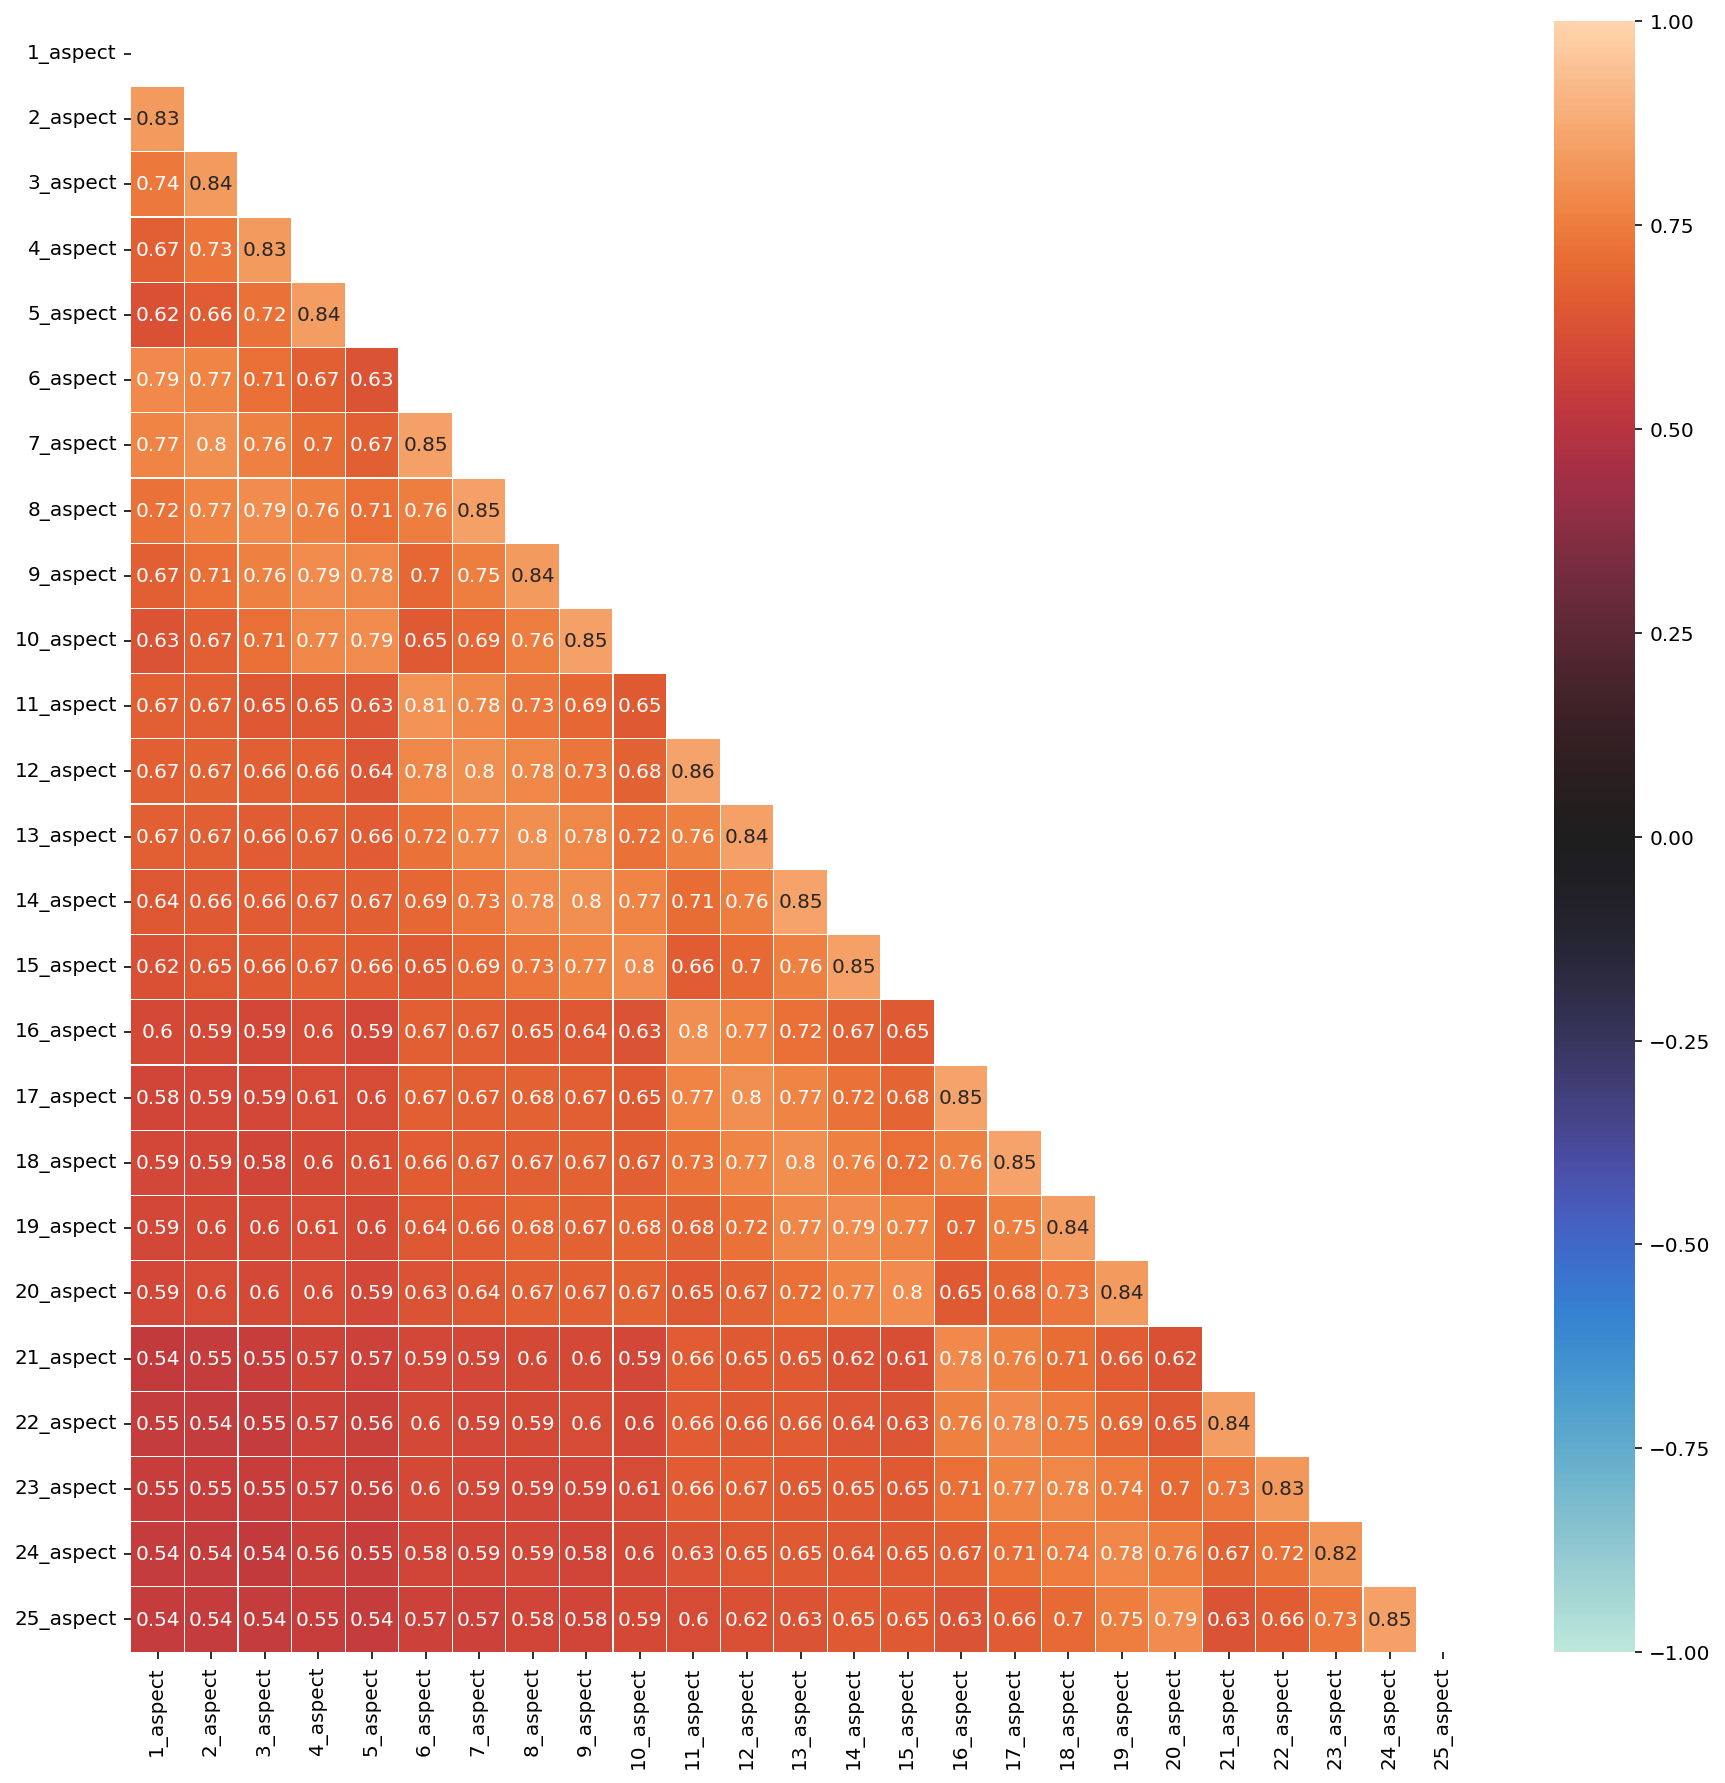

In [23]:
plot_corr_matrix(aspect_corr, 15)

Similar behaviour as *slope*, but the drop-off with increase in distance is lower.

### placurv
Planform curvature, curvature perpendicular to the direction of the maximum slope

In [24]:
placurv_cols = [f for f in features if f.endswith('placurv')]

In [25]:
placurv_corr = train[placurv_cols].corr()

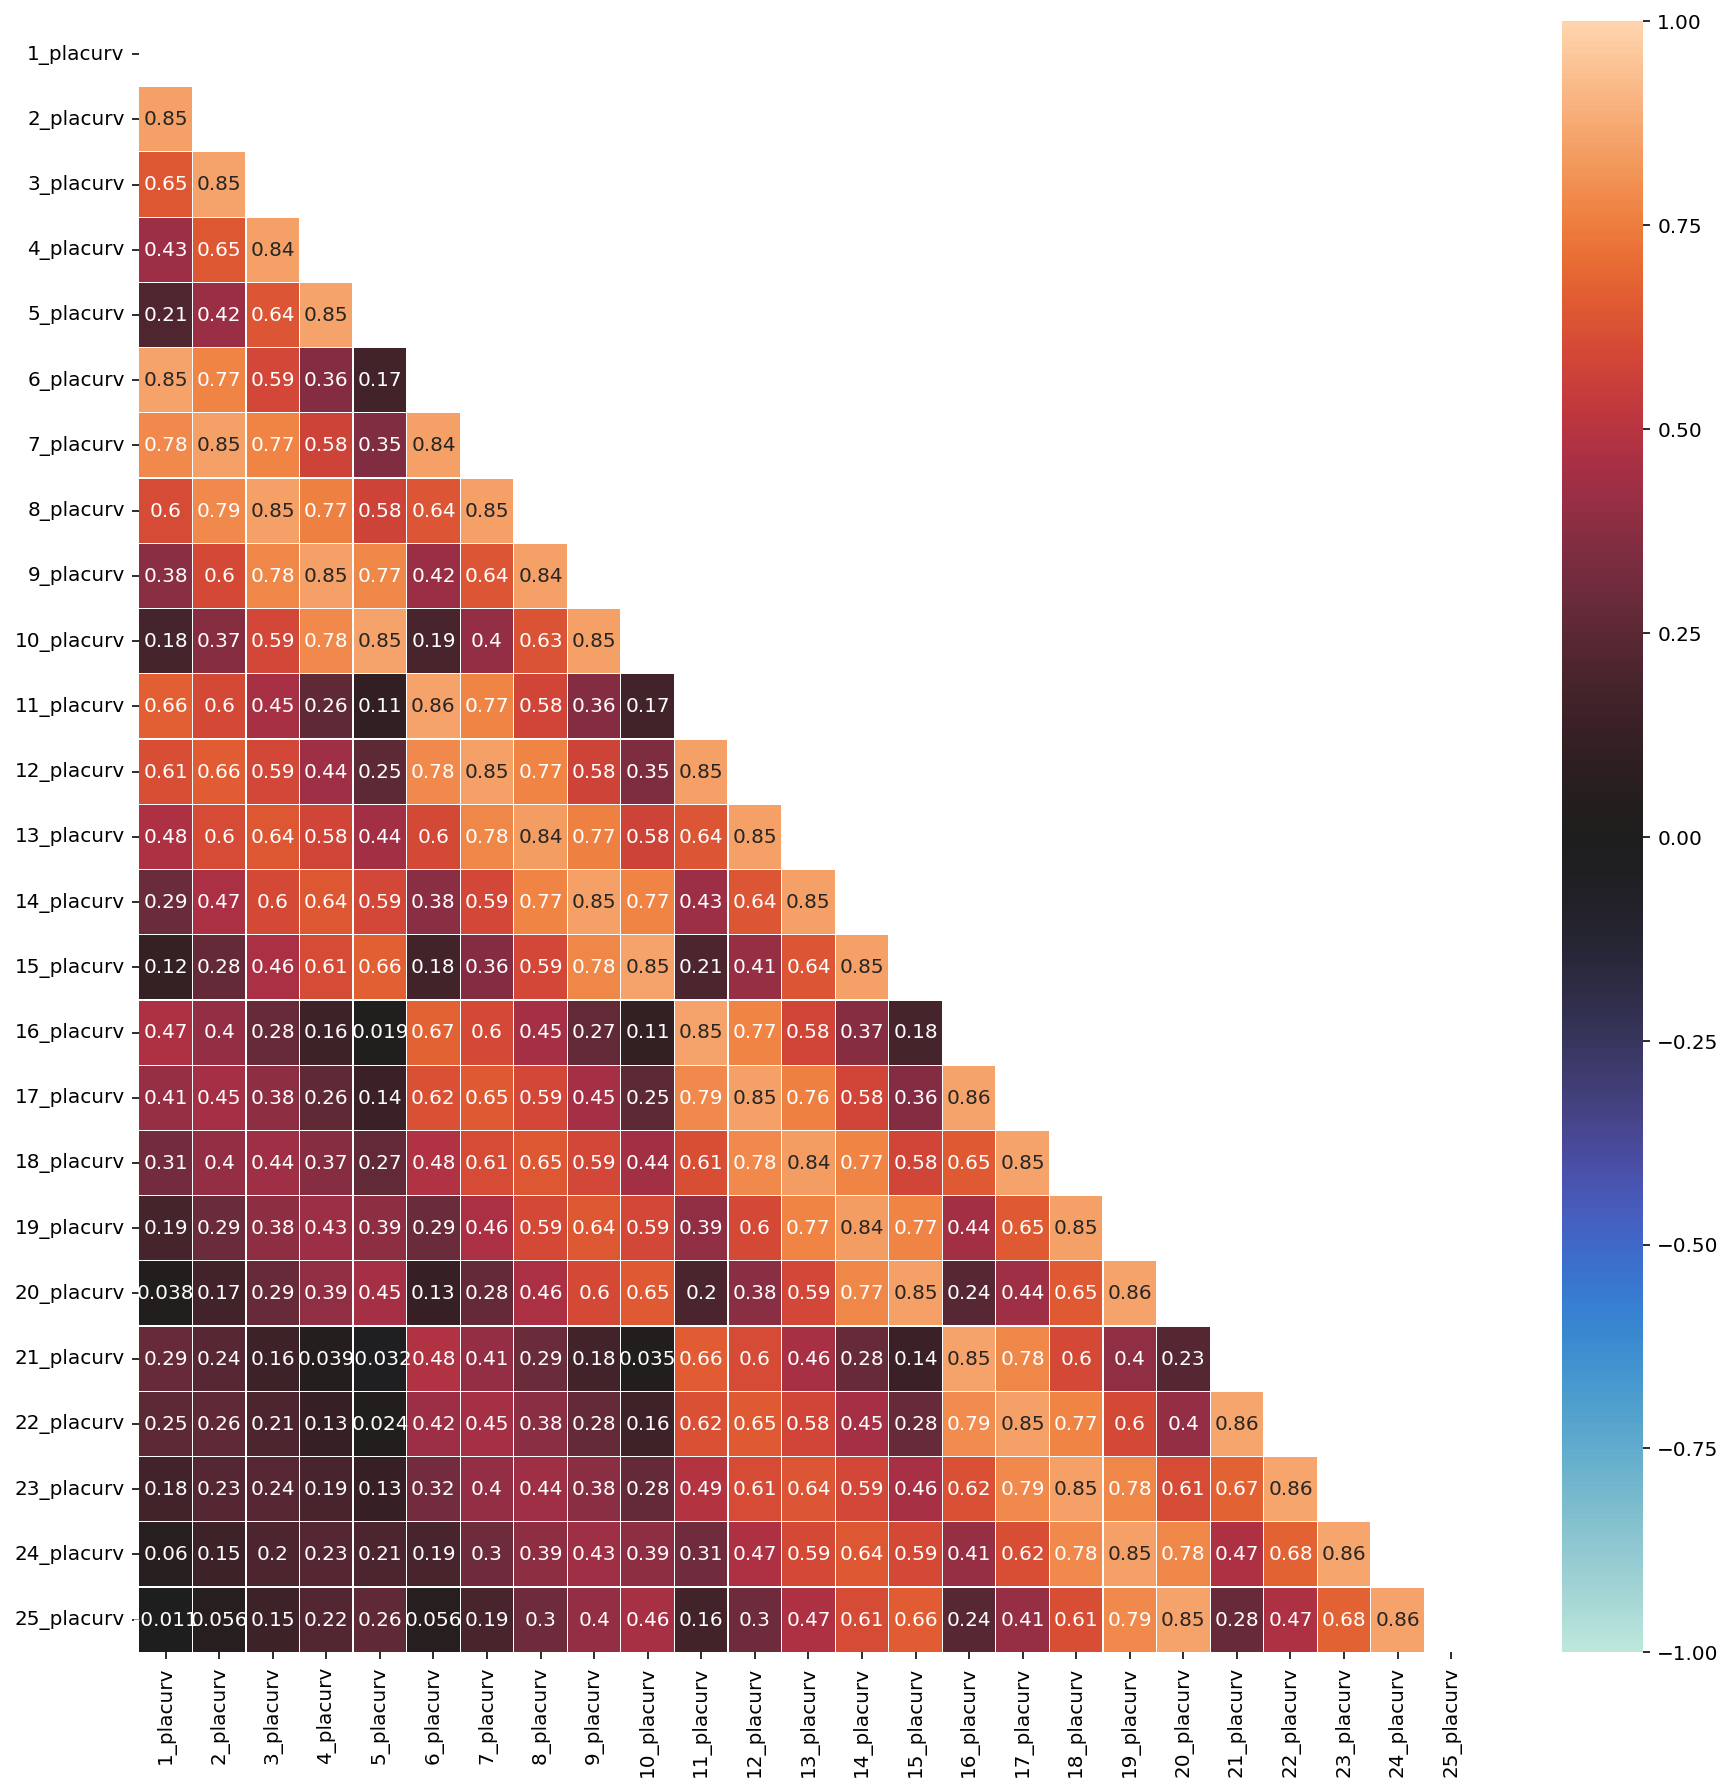

In [26]:
plot_corr_matrix(placurv_corr, 15)

Similar correlation behaviour as *slope* and *aspect*. But as opposed to *aspect*, the drop-off is steeper than *slope*.

### procurv
Profile curvature, curvature parallel to the slope, indicating the direction of maximum slope

In [27]:
procurv_cols = [f for f in features if f.endswith('procurv')]

In [28]:
procurv_corr = train[procurv_cols].corr()

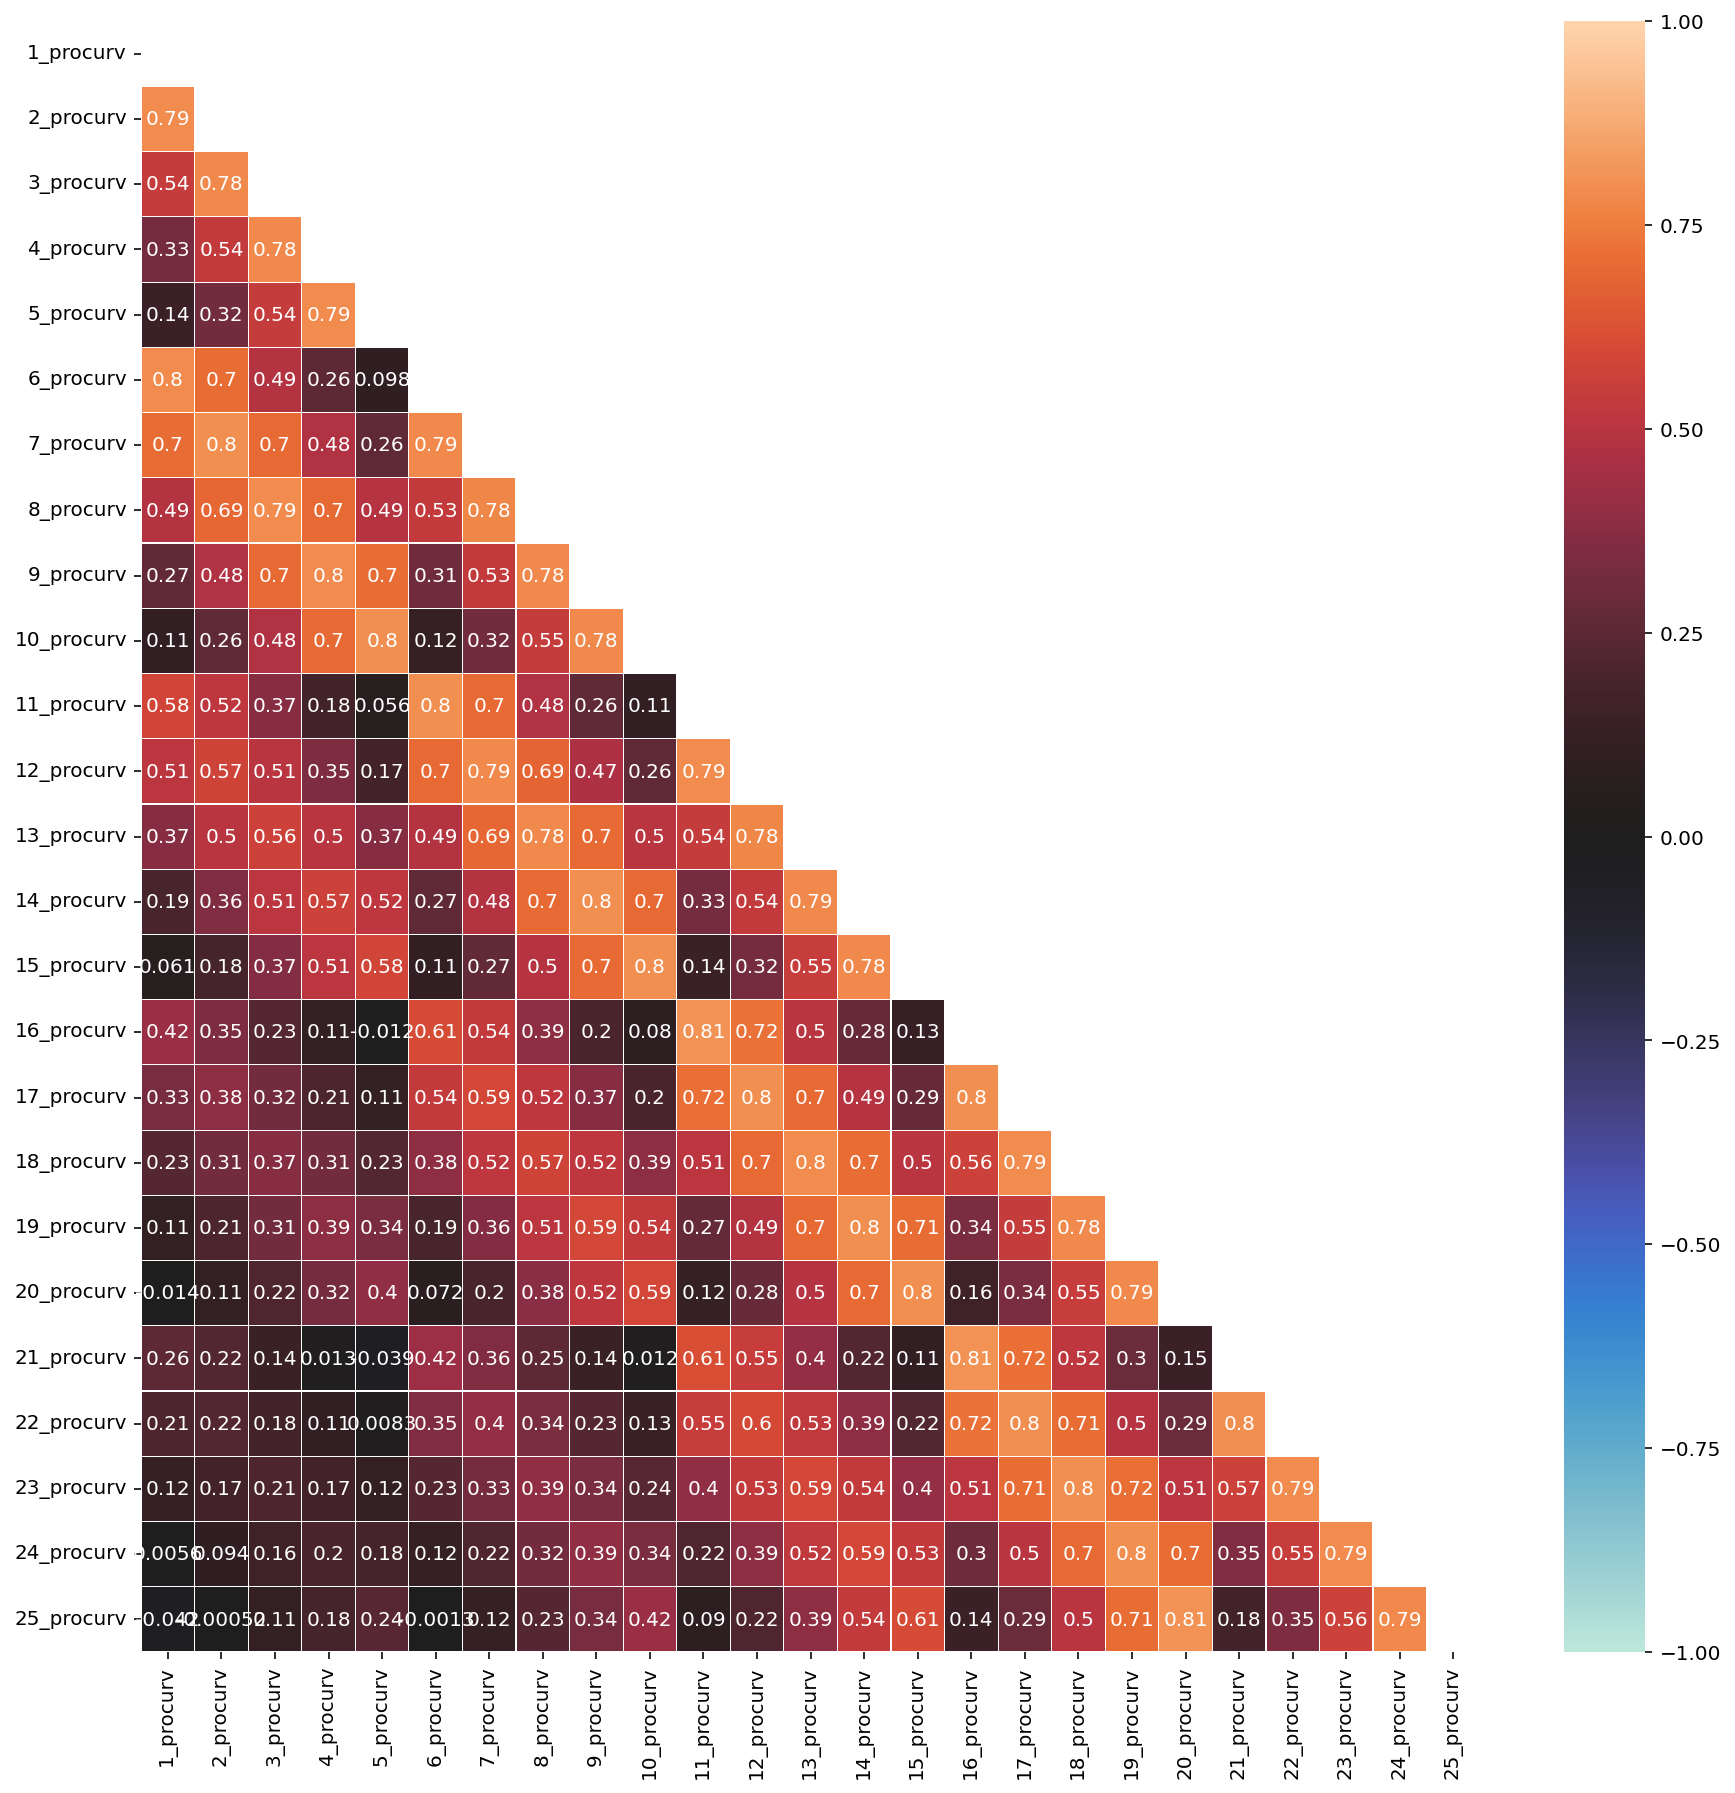

In [29]:
plot_corr_matrix(procurv_corr, 15)

Almost identical to *placurv* correlations, with slightly lower magnitude.

### lsfactor
Length-slope factor that accounts for the effects of topography on erosion

In [30]:
lsfactor_cols = [f for f in features if f.endswith('lsfactor')]

In [31]:
lsfactor_corr = train[lsfactor_cols].corr()

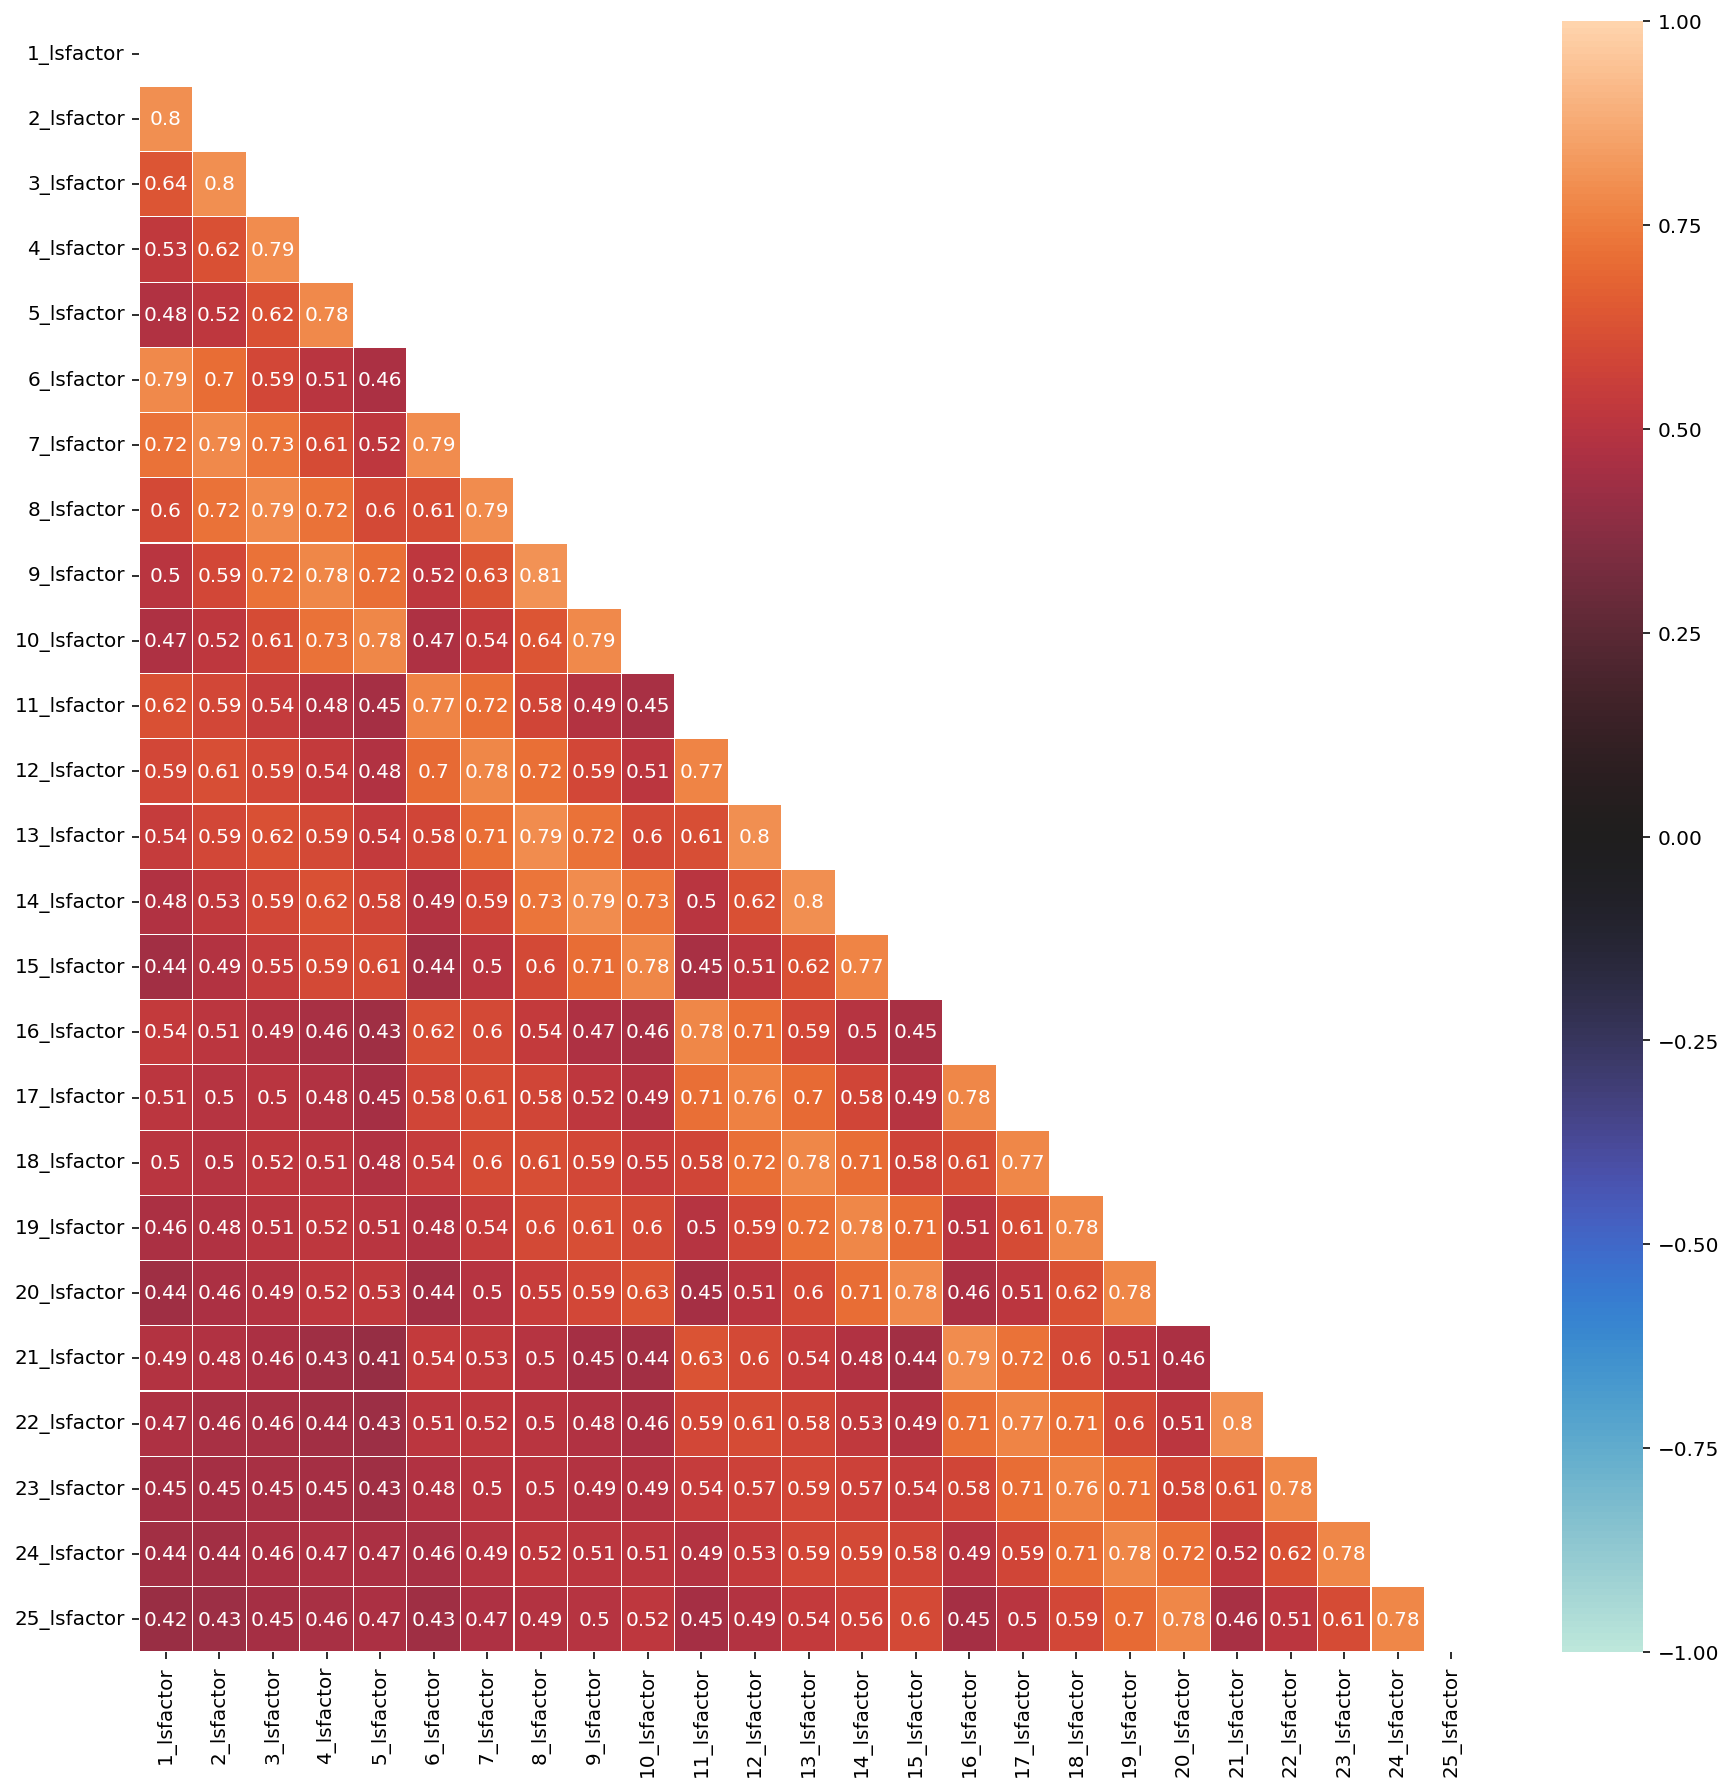

In [32]:
plot_corr_matrix(lsfactor_corr, 15)

Similar to *slope*.

### twi
Topographic wetness index, an index to quantify the topographic control on hydrological process

In [33]:
twi_cols = [f for f in features if f.endswith('twi')]

In [34]:
twi_corr = train[twi_cols].corr()

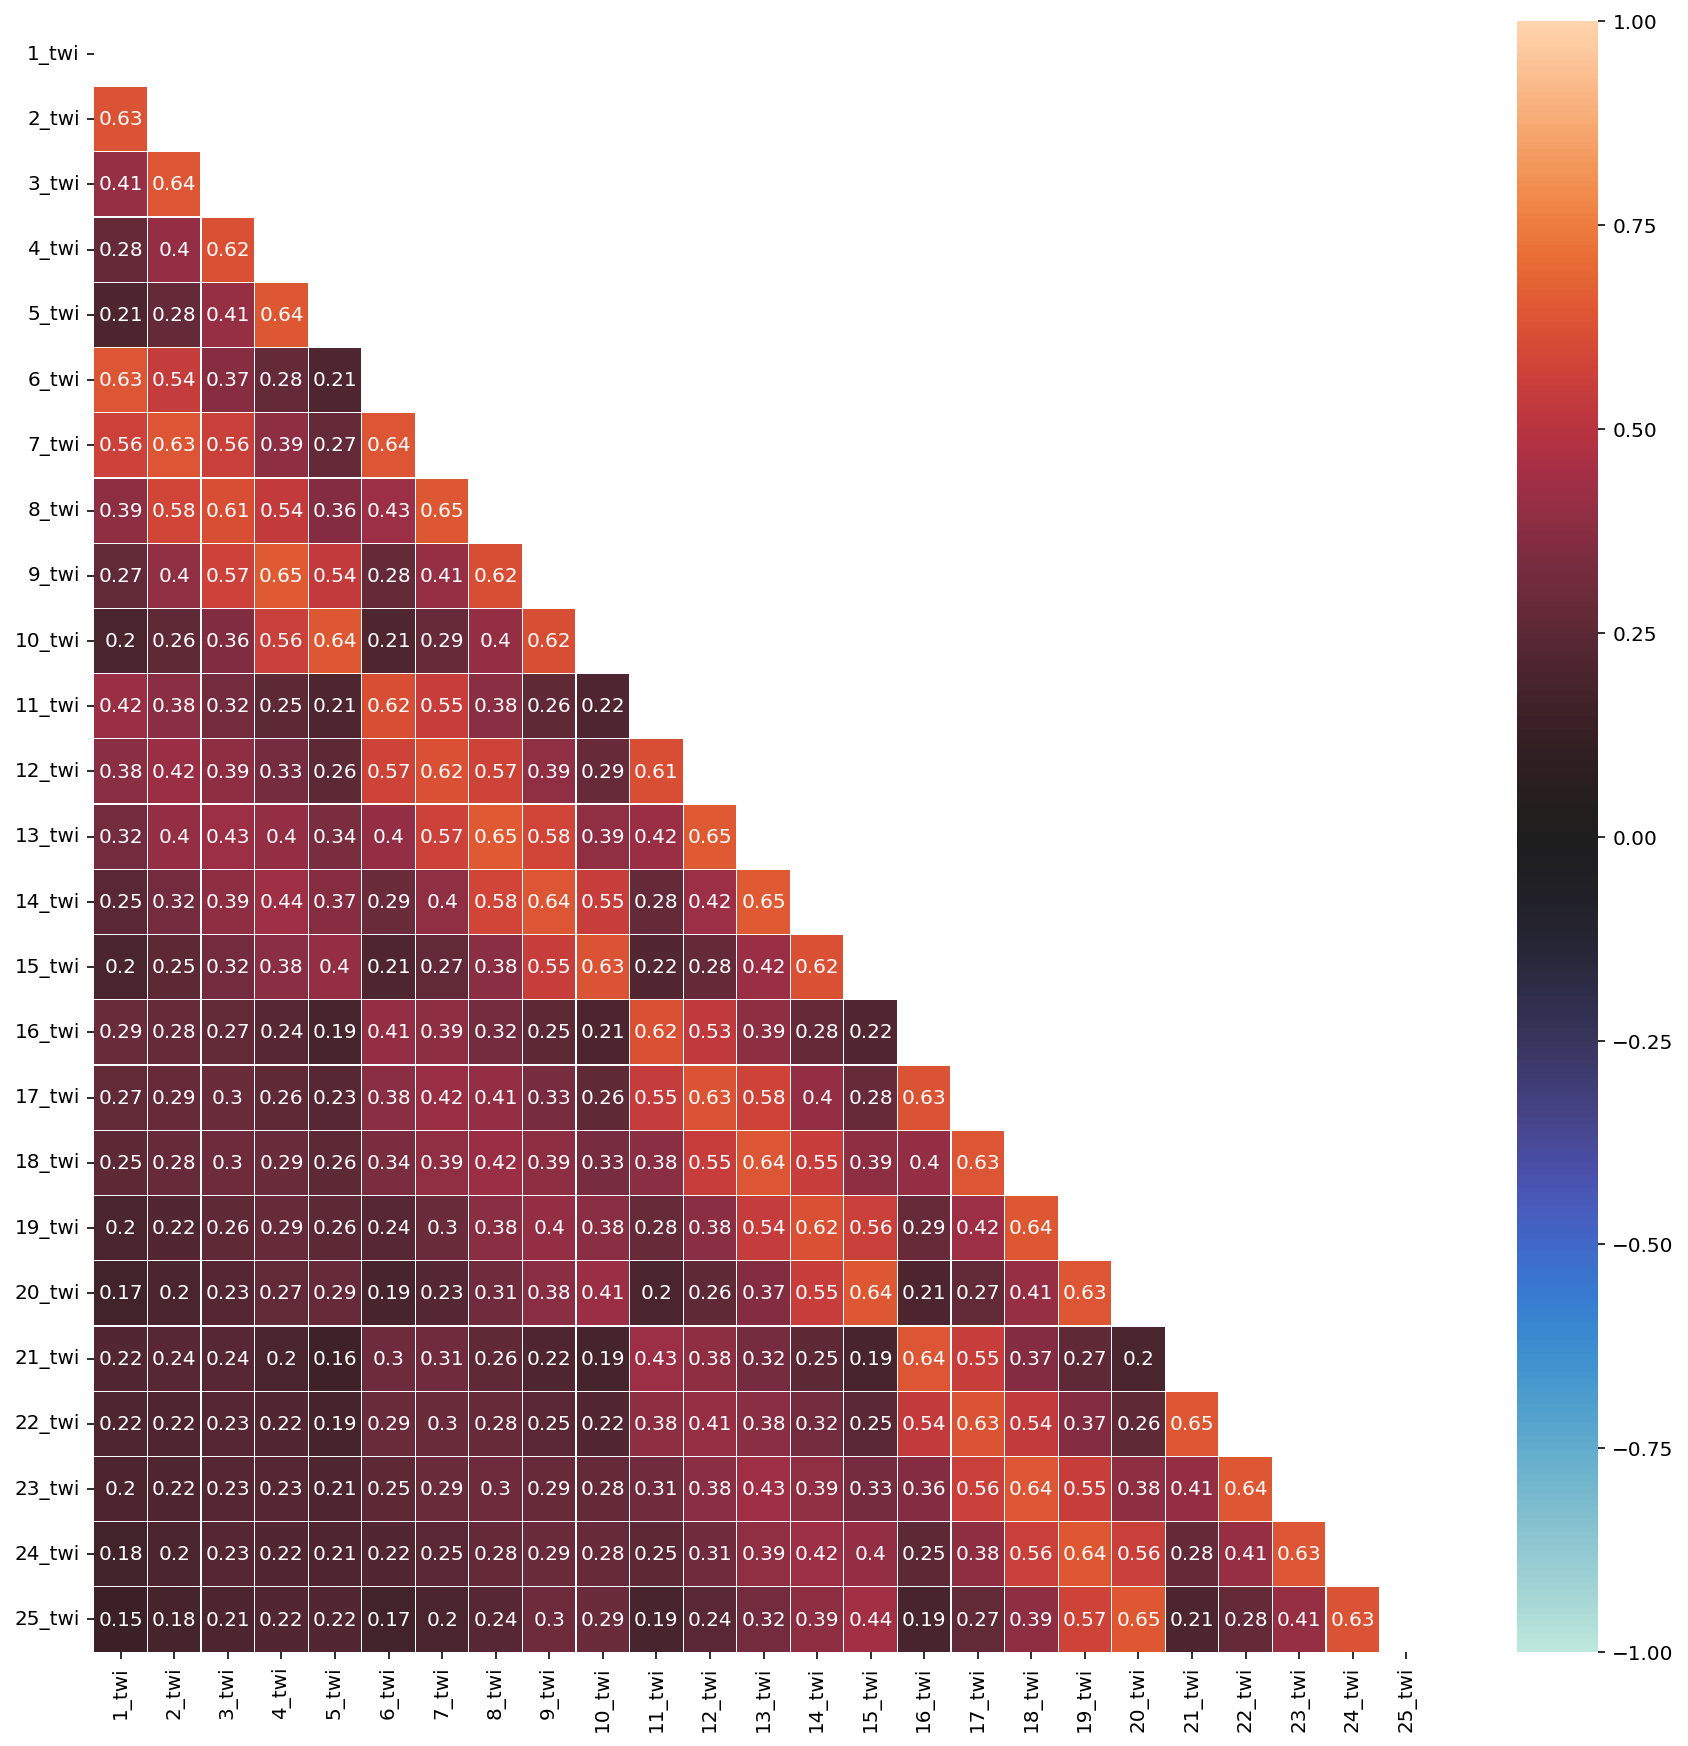

In [35]:
plot_corr_matrix(twi_corr, 15)

### sdoif
Step duration orographic intensification factor: an index to quantify the amplification of orography on rainfall

In [36]:
sdoif_cols = [f for f in features if f.endswith('sdoif')]

In [37]:
sdoif_corr = train[sdoif_cols].corr()

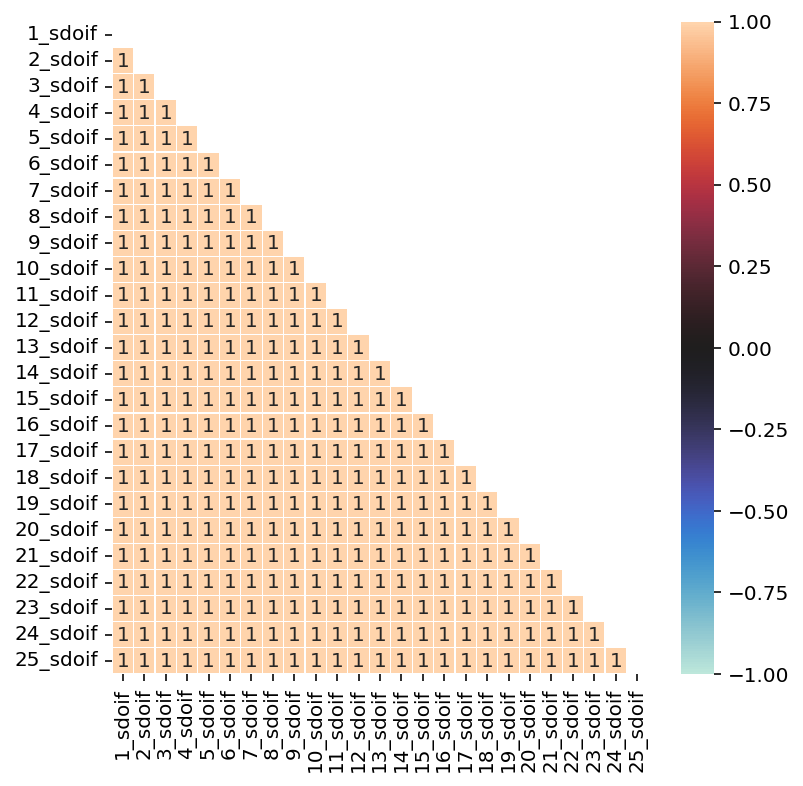

In [38]:
plot_corr_matrix(sdoif_corr, 6)

Perfect correlation just like *elevation*. Will create aggregate features.

### geology
Lithology of the surface material

1: Weathered Cretaceous granitic rocks  
2: Weathered Jurassic granite rocks  
3: Weathered Jurassic tuff and lava  
4: Weathered Cretaceous tuff and lava  
5: Quaternary deposits  
6: Fill  
7: Weathered Jurassic sandstone, siltstone and mudstone

In [39]:
geology_cols = [f for f in features if f.endswith('geology')]

In [40]:
train[geology_cols].head()

,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,2,2,5,5,2,2,5,5,5,2,2,5,5,5,2,2,5,5,5,2,5,5,5,5


Some samples have uniform geology while some may have mixed types.

In [41]:
geology_corr = train[geology_cols].corr()

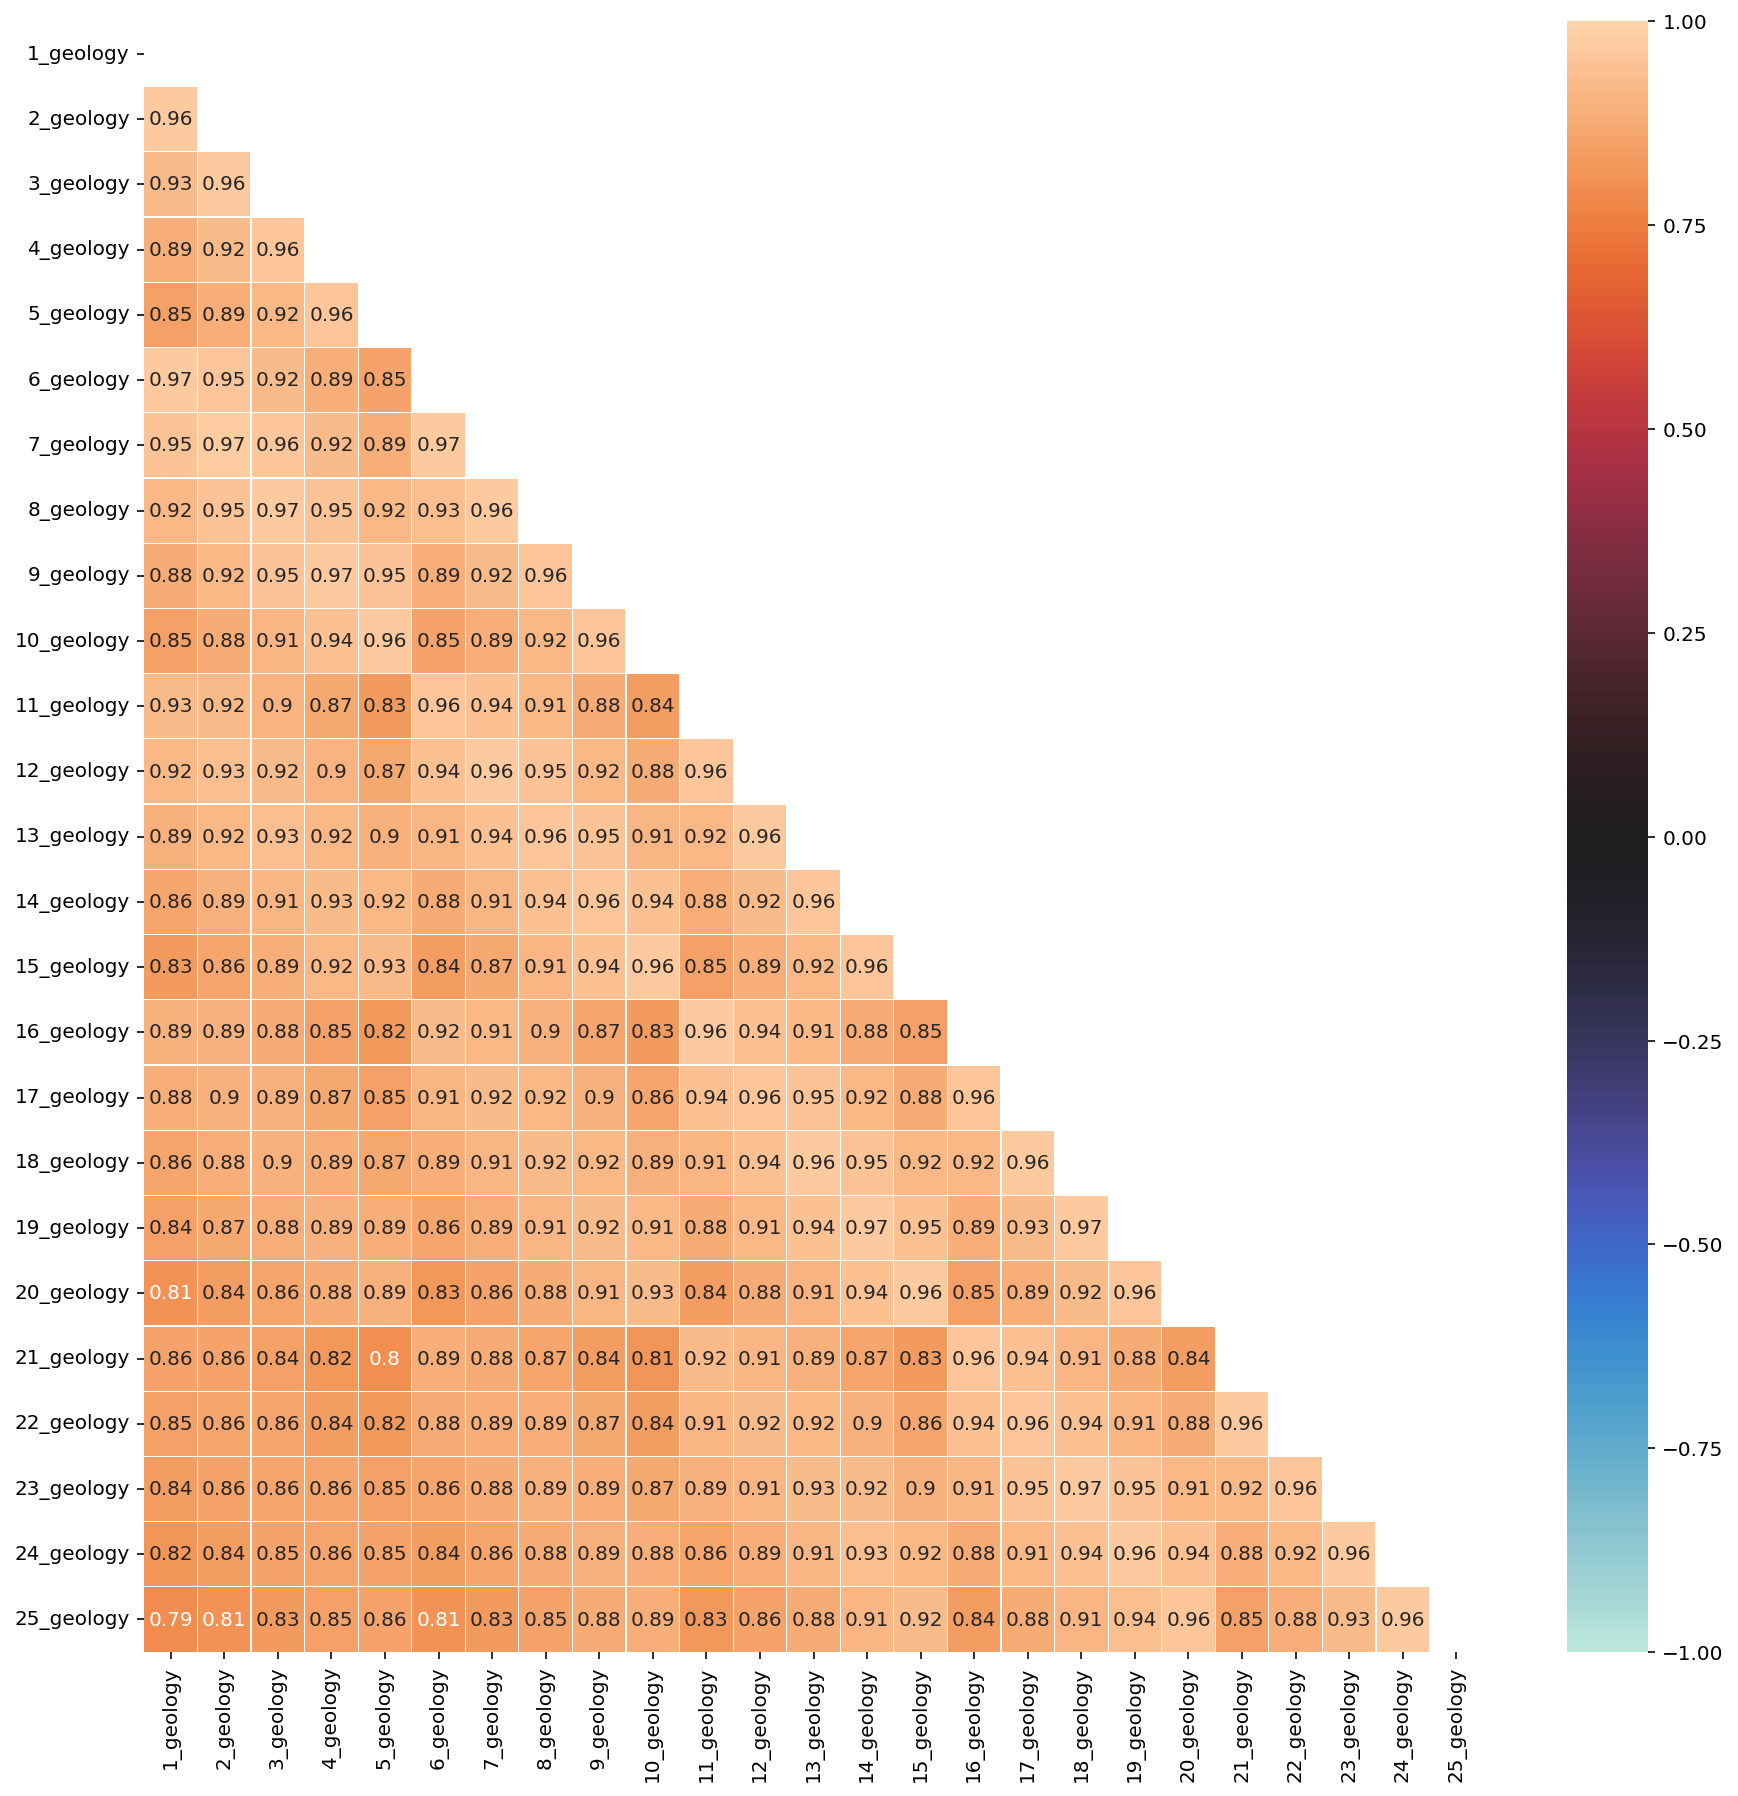

In [42]:
plot_corr_matrix(geology_corr, 15)

Fraction of samples with uniform geology:

In [43]:
(train[geology_cols].min(axis=1) == train[geology_cols].max(axis=1)).sum() / len(train)

0.8688328424153167

In [44]:
(test[geology_cols].min(axis=1) == test[geology_cols].max(axis=1)).sum() / len(test)

0.8734806629834254

Majority of the samples have common geology, because of which correlation is generally high. However, it is significantly higher between adjacent cells, similar to earlier features.  
Since most of the samples have uniform geology, creating aggregate features is better.

## Based on samples

### Visualizing samples

First, we can visualize the grid-like structure of a sample to gain some understanding about how the features vary. Some obvious indicators for landslides may also be visible.  
Unfortunately, the data does not specify the exact cell(s) containing the landslides, which would have been very informative.

In [45]:
def visualize_sample(id=0):
    rows = [               #cell arrangement according to data dictionary
        [1, 6, 11, 16, 21],
        [2, 7, 12, 17, 22],
        [3, 8, 13, 18, 23],
        [4, 9, 14, 19, 24],
        [5, 10, 15, 20, 25]
    ]
    features = ['elevation', 'slope', 'aspect', 'placurv', 'procurv', 
                'lsfactor', 'twi', 'sdoif', 'geology']
    
    print(f'Index: {id}, LABEL: {train.loc[id, TARGET]}')
    print('-' * 62)
    for row in rows:
        print('-' * 10, end='|')
        for cell in row:
            print(f'| Cell{cell:2}', end=' |')
        print('|')
        for feature in features:
            print(f'{feature:9}', end=' |')
            for cell in row:
                print(f"| {train.loc[id, f'{cell}_{feature}']:6.2f}", end=' |')
            print('|')
        print('-' * 62)

In [46]:
visualize_sample(0)

Index: 0, LABEL: 0
--------------------------------------------------------------
----------|| Cell 1 || Cell 6 || Cell11 || Cell16 || Cell21 ||
elevation || 130.00 || 126.00 || 122.00 || 119.00 || 116.00 ||
slope     ||  35.26 ||  38.88 ||  36.06 ||  33.85 ||  32.63 ||
aspect    ||  98.13 ||  97.13 || 105.95 || 116.56 || 128.66 ||
placurv   ||   0.04 ||   0.03 ||   0.02 ||   0.02 ||   0.01 ||
procurv   ||   0.01 ||   0.00 ||  -0.00 ||   0.00 ||  -0.02 ||
lsfactor  ||   8.05 ||   9.30 ||   9.34 ||   8.70 ||   8.52 ||
twi       ||   3.17 ||   3.22 ||   3.77 ||   3.85 ||   4.00 ||
sdoif     ||   1.28 ||   1.28 ||   1.28 ||   1.28 ||   1.28 ||
geology   ||   3.00 ||   3.00 ||   3.00 ||   3.00 ||   3.00 ||
--------------------------------------------------------------
----------|| Cell 2 || Cell 7 || Cell12 || Cell17 || Cell22 ||
elevation || 129.00 || 125.00 || 121.00 || 117.00 || 114.00 ||
slope     ||  37.29 ||  39.51 ||  40.51 ||  38.88 ||  30.25 ||
aspect    || 113.20 || 104.04 || 110

In [47]:
visualize_sample(1)

Index: 1, LABEL: 1
--------------------------------------------------------------
----------|| Cell 1 || Cell 6 || Cell11 || Cell16 || Cell21 ||
elevation || 161.00 || 162.00 || 162.00 || 162.00 || 162.00 ||
slope     ||  32.31 ||  27.02 ||  30.96 ||  26.57 ||  26.57 ||
aspect    || 198.44 || 191.31 || 180.00 || 180.00 || 180.00 ||
placurv   ||   0.01 ||   0.01 ||   0.02 ||   0.00 ||   0.02 ||
procurv   ||  -0.01 ||  -0.01 ||  -0.00 ||   0.00 ||   0.02 ||
lsfactor  ||   9.09 ||   7.02 ||   8.67 ||   7.23 ||   7.36 ||
twi       ||   4.40 ||   4.38 ||   4.46 ||   4.64 ||   4.73 ||
sdoif     ||   1.36 ||   1.36 ||   1.36 ||   1.36 ||   1.36 ||
geology   ||   3.00 ||   3.00 ||   3.00 ||   3.00 ||   3.00 ||
--------------------------------------------------------------
----------|| Cell 2 || Cell 7 || Cell12 || Cell17 || Cell22 ||
elevation || 158.00 || 159.00 || 159.00 || 160.00 || 160.00 ||
slope     ||  32.31 ||  35.26 ||  31.31 ||  27.02 ||  26.57 ||
aspect    || 198.44 || 188.13 || 189

In [48]:
visualize_sample(4)

Index: 4, LABEL: 0
--------------------------------------------------------------
----------|| Cell 1 || Cell 6 || Cell11 || Cell16 || Cell21 ||
elevation || 117.00 || 115.00 || 112.00 || 110.00 || 108.00 ||
slope     ||  32.63 ||  32.63 ||  30.25 ||  26.57 ||  26.57 ||
aspect    || 128.66 || 128.66 || 120.96 || 126.87 || 126.87 ||
placurv   ||   0.01 ||   0.02 ||   0.01 ||  -0.00 ||   0.01 ||
procurv   ||  -0.00 ||   0.01 ||   0.00 ||  -0.01 ||  -0.01 ||
lsfactor  ||   7.74 ||   7.80 ||   7.57 ||   6.62 ||   6.48 ||
twi       ||   3.52 ||   3.56 ||   3.95 ||   4.21 ||   4.10 ||
sdoif     ||   1.28 ||   1.28 ||   1.28 ||   1.28 ||   1.28 ||
geology   ||   2.00 ||   2.00 ||   2.00 ||   2.00 ||   2.00 ||
--------------------------------------------------------------
----------|| Cell 2 || Cell 7 || Cell12 || Cell17 || Cell22 ||
elevation || 115.00 || 113.00 || 111.00 || 109.00 || 106.00 ||
slope     ||  26.57 ||  29.50 ||  26.57 ||  30.25 ||  30.25 ||
aspect    || 126.87 || 135.00 || 126

After looking at both negative and positive samples, there are no obvious indicators of landslides. Since, the cell(s) affected by a landslide is/are not known, we cannot pinpoint anomalies. However, there are some takeaways:  
* *sdoif* shows no change across the cells neither negative nor positive samples. It may have no effect on the target variable.
* change in *geology* does not imply that there will be a significant change in other features.
* changes in elevation are present in both negative and positive samples, due to the natural slope of the terrain. Moreover, the sample with a landslide has a gentler gradient than the other two samples.
* placurv and procurv have very small changes in magnitude across the sample.
* possible identifiers for landslides could be sharp changes in slope, aspect and lsfactor.

### Cell features

In [49]:
def plot_cell_corr(cell_number: int):
    cell_features = [f for f in features if f.startswith(f'{cell_number}_')] + [TARGET]
    cell_corr = train[cell_features].corr()
    plot_corr_matrix(cell_corr, 8)

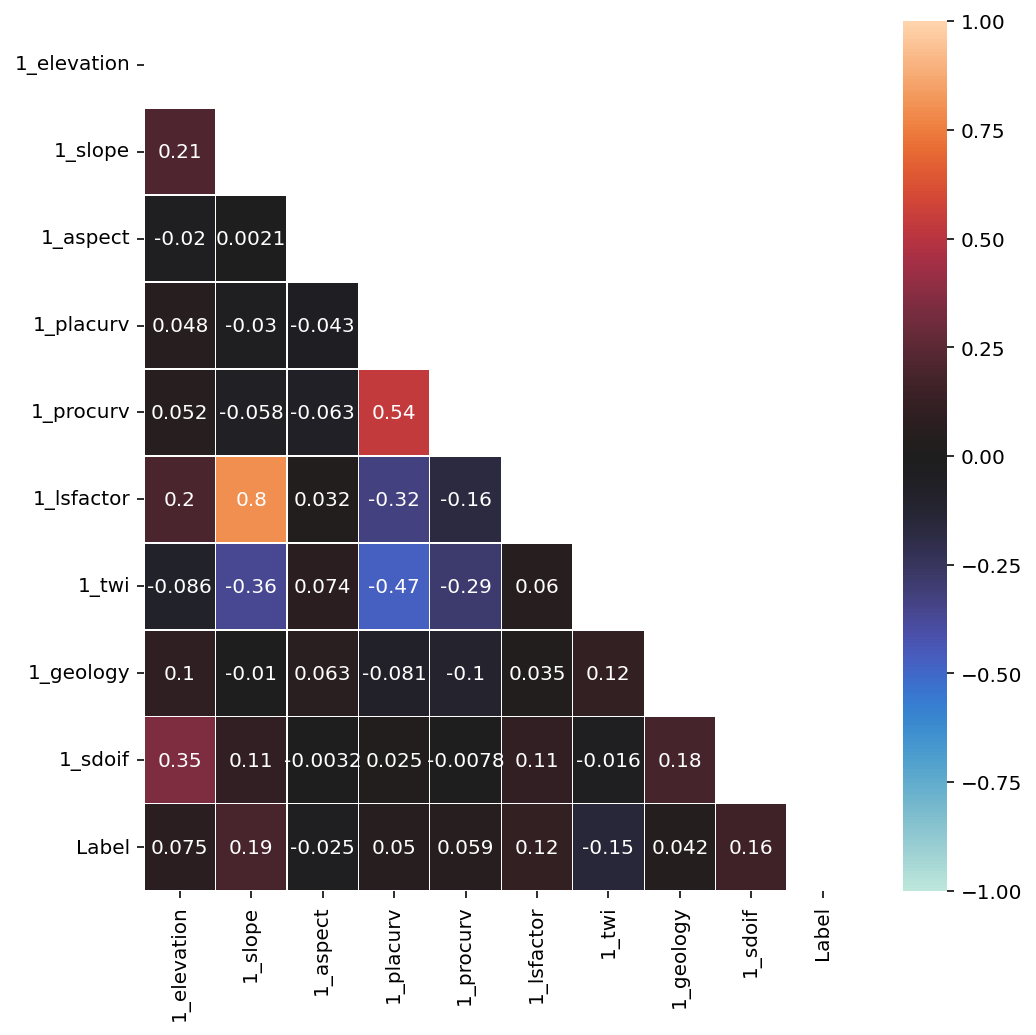

In [50]:
plot_cell_corr(1)

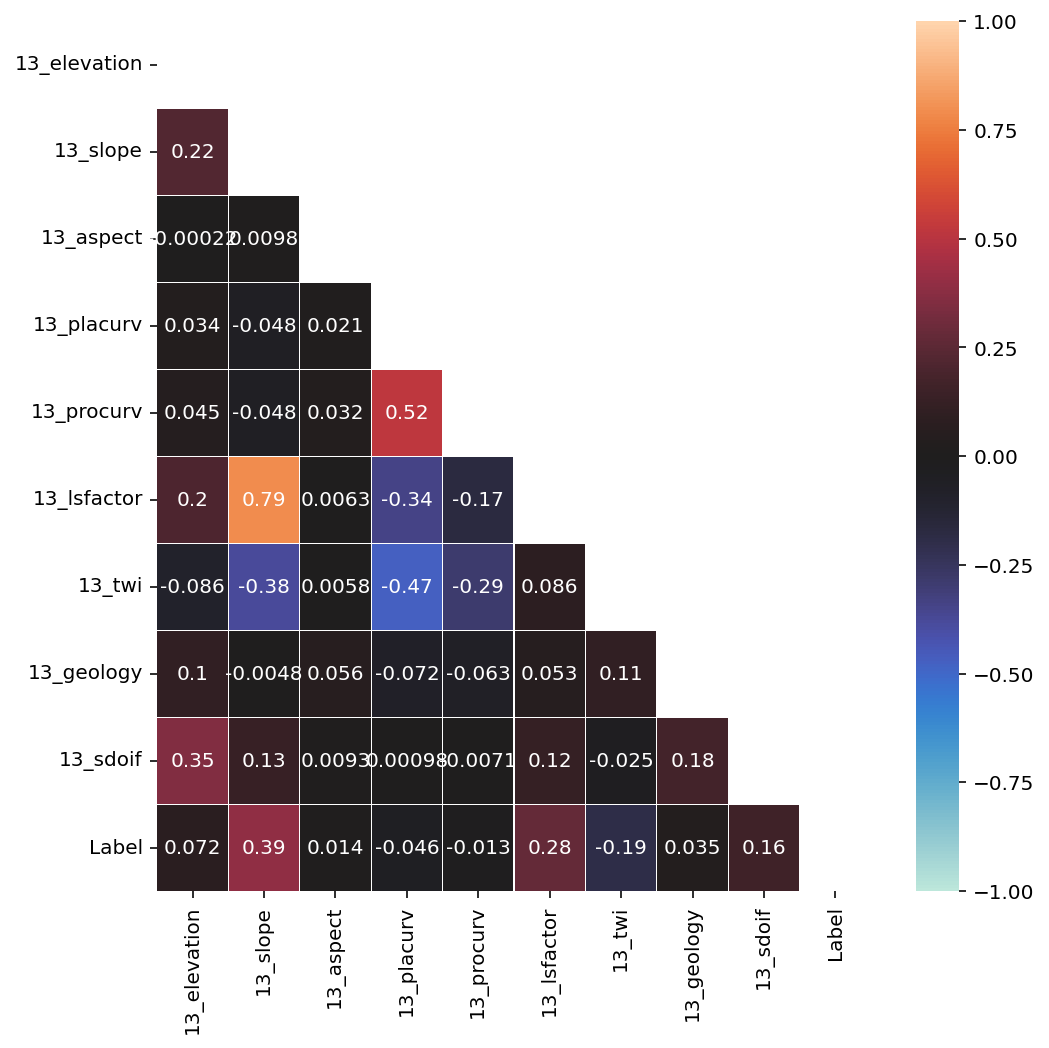

In [51]:
plot_cell_corr(13)

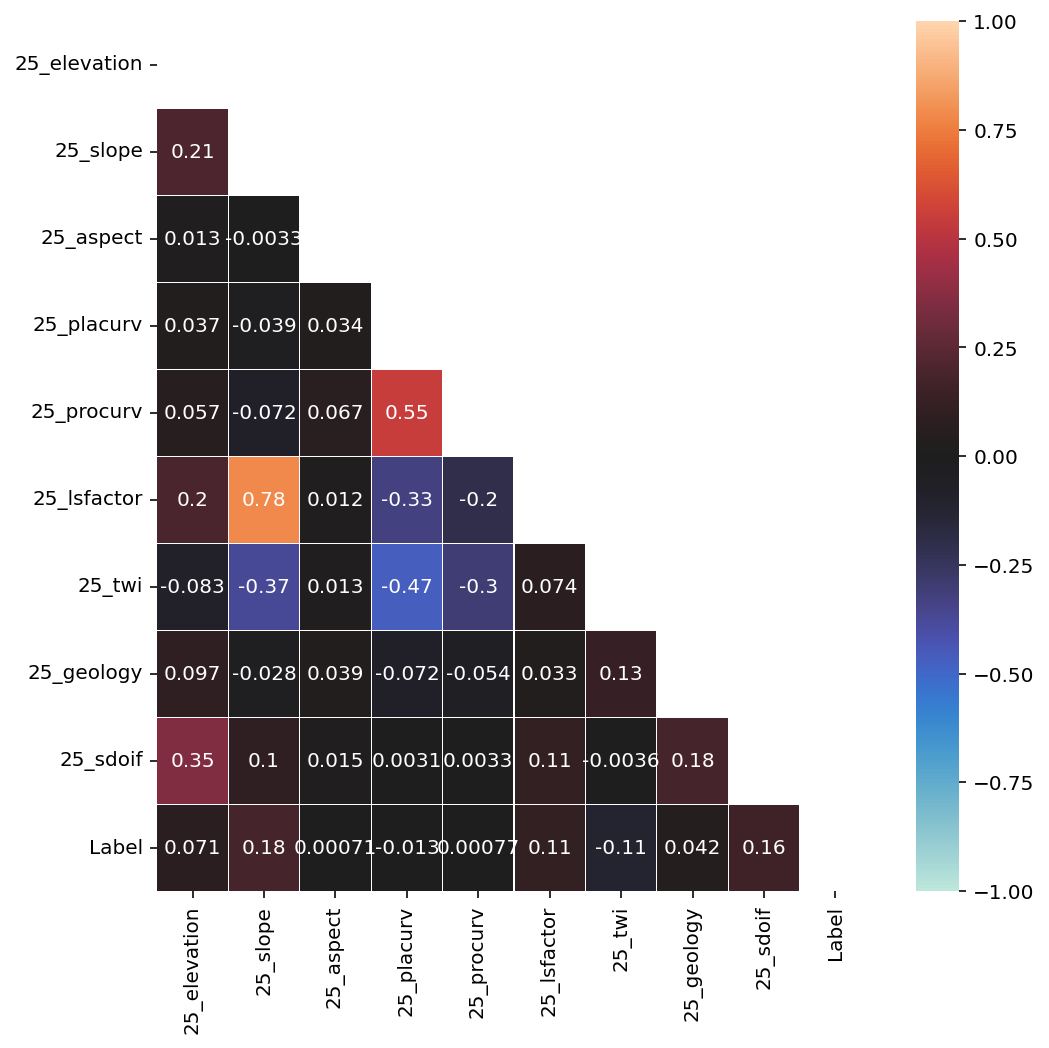

In [52]:
plot_cell_corr(25)

Similar correlation between cell features across the sample.  
* High positive correlation between *slope* and *lsfactor*.
* Moderate positive correlation between *procurv* and *placurv*.
* Moderate negative correlation between *twi* and *placurv*. 


# Feature engineering

**Aggregate features:**

In [64]:
def create_num_agg_features(df, feature):

    agg_df = pd.DataFrame()
    columns = [f for f in features if f.endswith(feature)]

    agg_df[f'agg_{feature}_mean'] = df[columns].mean(axis=1)
    agg_df[f'agg_{feature}_median'] = df[columns].median(axis=1)
    agg_df[f'agg_{feature}_min'] = df[columns].min(axis=1)
    agg_df[f'agg_{feature}_max'] = df[columns].max(axis=1)
    agg_df[f'agg_{feature}_std'] = df[columns].std(axis=1)

    return agg_df

In [69]:
def create_cat_agg_features(df, feature):

    agg_df = pd.DataFrame()
    columns = [f for f in features if f.endswith(feature)]

    agg_df[f'agg_{feature}_mode'] = df[columns].mode(axis=1)[0]
    agg_df[f'agg_{feature}_nunique'] = df[columns].nunique(axis=1)

    def get_pct_mode(row):
        row = list(row)
        mode = max(row, key=row.count)
        return row.count(mode) / len(row)

    agg_df[f'agg_{feature}_pct_mode'] = df[columns].apply(get_pct_mode, axis=1)

    return agg_df

**Gradient-based features:**

In [70]:
def create_grad_features(df, feature):

    grad_df = pd.DataFrame()
    rgrid = [               #row-wise arrangement of cells
        [1, 6, 11, 16, 21],
        [2, 7, 12, 17, 22],
        [3, 8, 13, 18, 23],
        [4, 9, 14, 19, 24],
        [5, 10, 15, 20, 25]
    ]
    cgrid = [               #column-wise arrangement of cells
        [1, 2, 3, 4, 5],
        [6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]
    ]

    for i in range(5):
        for j in range(4):
            r_newcol = f'grad_{feature}_{rgrid[i][j]}_{rgrid[i][j+1]}'
            c_newcol = f'grad_{feature}_{cgrid[i][j]}_{cgrid[i][j+1]}'

            grad_df[r_newcol] = df[f'{rgrid[i][j]}_{feature}'] - df[f'{rgrid[i][j+1]}_{feature}'] 
            
            grad_df[c_newcol] = df[f'{cgrid[i][j]}_{feature}'] - df[f'{cgrid[i][j+1]}_{feature}'] 

    return grad_df

In [71]:
feature_types = ['elevation', 'slope', 'aspect', 'placurv', 'procurv',
                 'lsfactor', 'twi', 'sdoif', 'geology']

In [72]:
train_agg = pd.read_csv(f'{DATA_PATH}/raw/train.csv')
test_agg = pd.read_csv(f'{DATA_PATH}/raw/test.csv')

for feature in feature_types:
    if feature == 'geology':
        train_agg = pd.concat(
            [
             train_agg, 
             create_cat_agg_features(train_agg, feature)
            ], 
            axis=1
        )
        test_agg = pd.concat(
            [
             test_agg, 
             create_cat_agg_features(test_agg, feature)
            ],
            axis=1
        )

    else:
        train_agg = pd.concat(
            [
             train_agg, 
             create_num_agg_features(train_agg, feature),
             create_grad_features(train_agg, feature)
            ], 
            axis=1
        )
        test_agg = pd.concat(
            [
             test_agg, 
             create_num_agg_features(test_agg, feature),
             create_grad_features(test_agg, feature)
            ], 
            axis=1
        )

In [73]:
train_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Columns: 590 entries, Sample_ID to agg_geology_pct_mode
dtypes: float64(495), int64(95)
memory usage: 48.9 MB


In [74]:
test_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Columns: 589 entries, Sample_ID to agg_geology_pct_mode
dtypes: float64(494), int64(95)
memory usage: 24.4 MB


In [77]:
created_features = [f for f in test_agg.columns if f.startswith('agg_') or f.startswith('grad_')]

In [78]:
train_agg[created_features].head()

,agg_elevation_mean,agg_elevation_median,agg_elevation_min,agg_elevation_max,agg_elevation_std,grad_elevation_1_6,grad_elevation_1_2,grad_elevation_6_11,grad_elevation_2_3,grad_elevation_11_16,grad_elevation_3_4,grad_elevation_16_21,grad_elevation_4_5,grad_elevation_2_7,grad_elevation_6_7,grad_elevation_7_12,grad_elevation_7_8,grad_elevation_12_17,grad_elevation_8_9,grad_elevation_17_22,grad_elevation_9_10,grad_elevation_3_8,grad_elevation_11_12,grad_elevation_8_13,grad_elevation_12_13,grad_elevation_13_18,grad_elevation_13_14,grad_elevation_18_23,grad_elevation_14_15,grad_elevation_4_9,grad_elevation_16_17,grad_elevation_9_14,grad_elevation_17_18,grad_elevation_14_19,grad_elevation_18_19,grad_elevation_19_24,grad_elevation_19_20,grad_elevation_5_10,grad_elevation_21_22,grad_elevation_10_15,grad_elevation_22_23,grad_elevation_15_20,grad_elevation_23_24,grad_elevation_20_25,grad_elevation_24_25,agg_slope_mean,agg_slope_median,agg_slope_min,agg_slope_max,agg_slope_std,grad_slope_1_6,grad_slope_1_2,grad_slope_6_11,grad_slope_2_3,grad_slope_11_16,grad_slope_3_4,grad_slope_16_21,grad_slope_4_5,grad_slope_2_7,grad_slope_6_7,grad_slope_7_12,grad_slope_7_8,grad_slope_12_17,grad_slope_8_9,grad_slope_17_22,grad_slope_9_10,grad_slope_3_8,grad_slope_11_12,grad_slope_8_13,grad_slope_12_13,grad_slope_13_18,grad_slope_13_14,grad_slope_18_23,grad_slope_14_15,grad_slope_4_9,grad_slope_16_17,grad_slope_9_14,grad_slope_17_18,grad_slope_14_19,grad_slope_18_19,grad_slope_19_24,grad_slope_19_20,grad_slope_5_10,grad_slope_21_22,grad_slope_10_15,grad_slope_22_23,grad_slope_15_20,grad_slope_23_24,grad_slope_20_25,grad_slope_24_25,agg_aspect_mean,agg_aspect_median,agg_aspect_min,agg_aspect_max,agg_aspect_std,grad_aspect_1_6,grad_aspect_1_2,grad_aspect_6_11,grad_aspect_2_3,grad_aspect_11_16,grad_aspect_3_4,grad_aspect_16_21,grad_aspect_4_5,grad_aspect_2_7,grad_aspect_6_7,grad_aspect_7_12,grad_aspect_7_8,grad_aspect_12_17,grad_aspect_8_9,grad_aspect_17_22,grad_aspect_9_10,grad_aspect_3_8,grad_aspect_11_12,grad_aspect_8_13,grad_aspect_12_13,grad_aspect_13_18,grad_aspect_13_14,grad_aspect_18_23,grad_aspect_14_15,grad_aspect_4_9,grad_aspect_16_17,grad_aspect_9_14,grad_aspect_17_18,grad_aspect_14_19,grad_aspect_18_19,grad_aspect_19_24,grad_aspect_19_20,grad_aspect_5_10,grad_aspect_21_22,grad_aspect_10_15,grad_aspect_22_23,grad_aspect_15_20,grad_aspect_23_24,grad_aspect_20_25,grad_aspect_24_25,agg_placurv_mean,agg_placurv_median,agg_placurv_min,agg_placurv_max,agg_placurv_std,grad_placurv_1_6,grad_placurv_1_2,grad_placurv_6_11,grad_placurv_2_3,grad_placurv_11_16,grad_placurv_3_4,grad_placurv_16_21,grad_placurv_4_5,grad_placurv_2_7,grad_placurv_6_7,grad_placurv_7_12,grad_placurv_7_8,grad_placurv_12_17,grad_placurv_8_9,grad_placurv_17_22,grad_placurv_9_10,grad_placurv_3_8,grad_placurv_11_12,grad_placurv_8_13,grad_placurv_12_13,grad_placurv_13_18,grad_placurv_13_14,grad_placurv_18_23,grad_placurv_14_15,grad_placurv_4_9,grad_placurv_16_17,grad_placurv_9_14,grad_placurv_17_18,grad_placurv_14_19,grad_placurv_18_19,grad_placurv_19_24,grad_placurv_19_20,grad_placurv_5_10,grad_placurv_21_22,grad_placurv_10_15,grad_placurv_22_23,grad_placurv_15_20,grad_placurv_23_24,grad_placurv_20_25,grad_placurv_24_25,agg_procurv_mean,agg_procurv_median,agg_procurv_min,agg_procurv_max,agg_procurv_std,grad_procurv_1_6,grad_procurv_1_2,grad_procurv_6_11,grad_procurv_2_3,grad_procurv_11_16,grad_procurv_3_4,grad_procurv_16_21,grad_procurv_4_5,grad_procurv_2_7,grad_procurv_6_7,grad_procurv_7_12,grad_procurv_7_8,grad_procurv_12_17,grad_procurv_8_9,grad_procurv_17_22,grad_procurv_9_10,grad_procurv_3_8,grad_procurv_11_12,grad_procurv_8_13,grad_procurv_12_13,grad_procurv_13_18,grad_procurv_13_14,grad_procurv_18_23,grad_procurv_14_15,grad_procurv_4_9,grad_procurv_16_17,grad_procurv_9_14,grad_procurv_17_18,grad_procurv_14_19,grad_procurv_18_19,grad_procurv_19_24,grad_procurv_19_20,grad_procurv_5_10,grad_procurv_21_22,grad_procurv_10_15,grad_procurv_22_23,grad_procurv_15_20,grad_procurv_23_24,gr

# Processed data

In [79]:
#reduce memory usage
def reduce_mem(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in ['int64', 'float64']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df

In [80]:
train_agg = reduce_mem(train_agg)
test_agg = reduce_mem(test_agg)

In [82]:
train_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Columns: 590 entries, Sample_ID to agg_geology_pct_mode
dtypes: float16(495), int16(28), int8(67)
memory usage: 11.5 MB


Reduced from 48.9 MB to 11.5 MB.

In [81]:
if not os.path.isdir(f'{DATA_PATH}/processed'):
    os.makedirs(f'{DATA_PATH}/processed')

train_agg.to_csv(f'{DATA_PATH}/processed/train_agg.csv', index=False)
test_agg.to_csv(f'{DATA_PATH}/processed/test_agg.csv', index=False)